In [693]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [694]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [695]:
%matplotlib inline
%config InlineBackend.figure_format= 'retina'

In [696]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [697]:
print(data.shape, test_data.shape)

(891, 12) (418, 11)


In [698]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data analysis

In [699]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [700]:
data.drop(['Name', 'PassengerId','Cabin','Ticket'], inplace = True,axis = 1)

In [701]:
num_features = [features for features in data.columns if data[features].dtypes != 'O' and features != 'Survived']
print(num_features)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [702]:
cat_features = [features for features in data.columns if data[features].dtypes == 'O']
print(cat_features)

['Sex', 'Embarked']


In [703]:
y = data.pop('Survived')


In [704]:
x = data

In [705]:
x.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [706]:
x['Age'].fillna(method = 'backfill',inplace = True)

In [707]:
x.Embarked.fillna(method = 'ffill',inplace = True)

In [708]:
data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

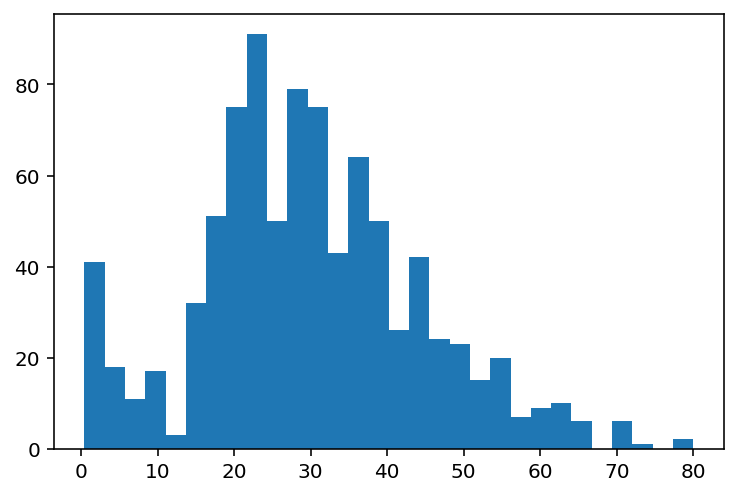

In [709]:
plt.hist(x['Age'],bins = 30);

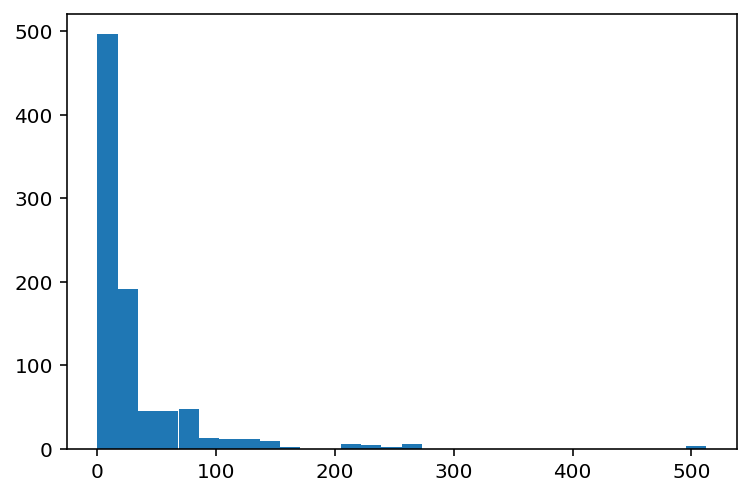

In [710]:
plt.hist(x['Fare'],bins = 30);

In [711]:
x['Fare'] = np.log(x['Fare']+1)

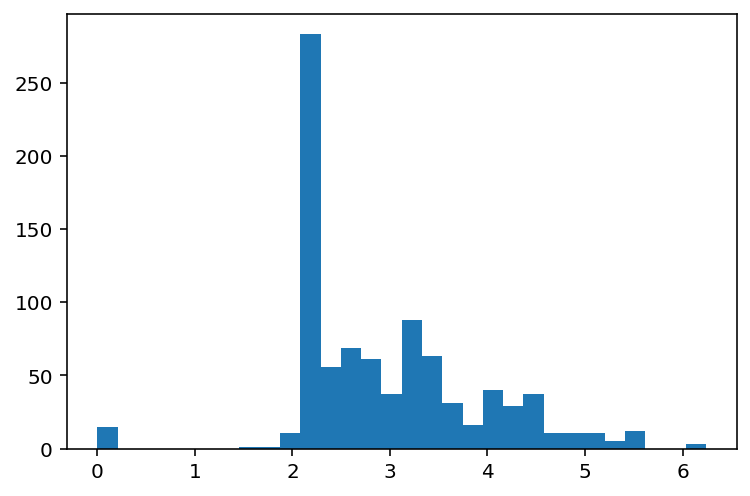

In [712]:
plt.hist(x['Fare'],bins = 30);

In [713]:
print(num_features)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [714]:
from sklearn.preprocessing import MinMaxScaler

In [715]:
d = ['Age','Fare']
scaler = MinMaxScaler()
x[d] = scaler.fit_transform(x[d])


In [716]:

x.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.271174,1,0,0.338125,S
1,1,female,0.472229,1,0,0.685892,C
2,3,female,0.321438,0,0,0.350727,S
3,1,female,0.434531,1,0,0.639463,S
4,3,male,0.434531,0,0,0.352955,S


In [717]:
cat_features

['Sex', 'Embarked']

In [718]:
cat = ['Sex','Embarked']

In [719]:
x = pd.get_dummies(x)

In [720]:
x.shape

(891, 10)

In [721]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.271174,1,0,0.338125,0,1,0,0,1
1,1,0.472229,1,0,0.685892,1,0,1,0,0
2,3,0.321438,0,0,0.350727,1,0,0,0,1
3,1,0.434531,1,0,0.639463,1,0,0,0,1
4,3,0.434531,0,0,0.352955,0,1,0,0,1


### Test data processin


In [722]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [723]:
test_data.drop(['PassengerId','Name','Cabin','Ticket'],inplace = True,axis =1)


In [724]:
test_data.shape

(418, 7)

In [725]:
test_data.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [726]:
test_data['Age'].fillna(method = 'ffill',inplace = True)

In [727]:
test_data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [761]:
test_data.fillna(test_data['Fare'].mean(),inplace = True)

In [730]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [731]:
test_data['Fare'] = np.log(test_data['Fare']+1)

In [732]:
test_data.shape

(418, 7)

In [733]:
d = ['Fare','Age']
test_data[d] = scaler.fit_transform(test_data[d])

In [734]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.452723,0,0,0.348997,Q
1,3,female,0.617566,1,0,0.333195,S
2,2,male,0.815377,0,0,0.379604,Q
3,3,male,0.353818,0,0,0.363449,S
4,3,female,0.287881,1,1,0.414494,S


In [735]:
test_data = pd.get_dummies(test_data)

In [736]:
test_data.shape

(418, 10)

In [737]:
from sklearn.model_selection import train_test_split

In [738]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,shuffle = True,random_state = 0)

### Applying various model

In [739]:
### Applying Decision Tree Classifier

In [740]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


In [741]:
params = {'max_depth':[10,20,50,100,300,500],
          'min_samples_leaf':[2,5,10,20,30,40,50,100,200],
          'min_samples_split':[2,5,10,20,30,40,50]
         }

In [742]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [743]:
y_pred = clf_dt.predict(X_test)

In [744]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8100558659217877

In [745]:
rand_df = RandomizedSearchCV(clf_dt,param_distributions=params,scoring='precision')
rand_df.fit(X_train,y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='b

In [746]:
#rand.best_estimator
rand_df.best_score_

0.8205976178033272

In [747]:
best_dt = rand_df.best_estimator_

In [748]:
y_pred = best_dt.predict(X_test)

In [749]:
accuracy_score(y_test,y_pred)

0.7877094972067039

In [750]:
### Applying RandomForest

In [751]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
params = {'n_estimators':[10,20,30,40,50,60,90,120,160,200,300],'max_depth':[10,20,50,100,300,500],
          'min_samples_leaf':[2,5,10,20,30,40,50,100,200],
          'min_samples_split':[2,5,10,20,30,40,50]}

In [752]:
rand_rf = RandomizedSearchCV(clf_rf,param_distributions=params,scoring='precision')
rand_rf.fit(X_train,y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [753]:
best_rf = rand_rf.best_estimator_

In [754]:
y_pred = best_rf.predict(X_test)

In [755]:
accuracy_score(y_test,y_pred)

0.7877094972067039

In [756]:
###AdaBoost

In [757]:
from sklearn.ensemble import AdaBoostClassifier
clf_ad = AdaBoostClassifier()
params = {'learning_rate':[0.2,0.5,0.8,1],'n_estimators':[10,30,50,80,120,150,200,300]}
rand_ad = RandomizedSearchCV(clf_ad,param_distributions=params)
rand_ad.fit(X_train,y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.2, 0.5, 0.8, 1],
                                        'n_estimators': [10, 30, 50, 80, 120,
                                                         150, 200, 300]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [758]:
best = rand_ad.best_estimator_

In [762]:
y_pred = best.predict(X_test)
accuracy_score(y_test,y_pred)

0.8212290502793296

In [763]:
surv = best.predict(test_data) 

In [764]:
surv

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [765]:
test_data['Survived'] = surv

In [766]:
test_data_1 = pd.read_csv('test.csv')

In [767]:
test_data['PassengerId'] = test_data_1.pop('PassengerId')


In [771]:
test_data = test_data[['PassengerId','Survived']]

In [772]:
test_data.rename({'PassengerID':'PassengerId'},axis =1,inplace = True)

In [773]:
test_data.to_csv('PPPPPP',index = False)

In [774]:
test_data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
